# `numpy` practice

In [2]:
import numpy as np

1. Do numpy exercises 6, 8, 9 and 19.

1. numpy exercise 44.

1. A snail curve is defined by the following equation in polar coordinates: $r = a + \cos\phi$. Plot the curve on an $x$-$y$ plane for several values of $a$. (Hint: `np.linspace` creates a linearly spaced array of values)

2. A *cochleoid* curve is defined by the following equation in polar coordinates: $r = a \dfrac{\sin\phi} {\phi }$. Plot the curve on an $x$-$y$ plane. (This time, use `np.where` to work around division by zero).

3. Given two arrays, `u` and `v`, construct the Cauchy matrix using 1) explicit broadcasting, and 2) `subtract.outer` attribute.

4. See "Monte Carlo Error propagation" (separate html)

N. Rougier, *Numpy 100 excercises*, https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_no_solution.md

In [5]:
# task 6
a = np.zeros(10)
a[4] = 1
a

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [8]:
# task 8
b = a[::-1]
b

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [10]:
# task 9
m = np.arange(9).reshape(3, -1)
m

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [20]:
# task 19
r = np.array(([1, 0] * 4 + [0, 1] * 4) * 4).reshape((8, 8))
r

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

In [34]:
def convert(vec):
    x = vec[0]
    y = vec[1]
    r = np.sqrt(x ** 2 + y ** 2)
    angle = np.arctan2(y, x)
    return (r, angle)

np.random.seed(1234)  
m = np.random.random(size=20).reshape(10, 2)
o = np.apply_along_axis(convert, 1, m)
o


array([[0.65092167, 1.27214855],
       [0.89910716, 1.06231974],
       [0.82623785, 0.3362191 ],
       [0.84819306, 1.23878522],
       [1.29818681, 0.74060617],
       [0.61565357, 0.95059494],
       [0.98745418, 0.80633754],
       [0.67232937, 0.98759553],
       [0.50327154, 0.02736131],
       [1.17316515, 0.85163559]])

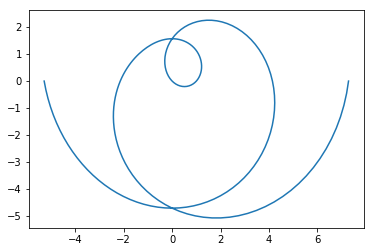

In [9]:
# task 3 (snail curve)
phi = np.linspace(-2*np.pi, 2*np.pi, 201) 
a = np.linspace(-2*np.pi, 2*np.pi, 201)
r = a + np.cos(phi) 

x = r * np.cos(phi)
y = r * np.sin(phi)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, y)
plt.show()

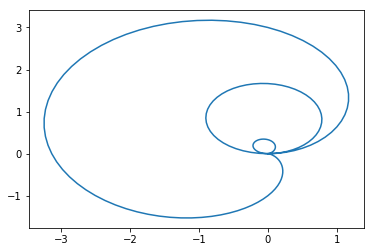

In [55]:
# task 4
phi = np.linspace(-2*np.pi, 2*np.pi, 201) #arange - для целочисленных, linspace - для всего чего угодно 
a = np.linspace(-2*np.pi, 2*np.pi, 201) - np.pi
phi = phi[np.where(phi != 0)]

r = a * np.sin(phi) / phi
x = r * np.cos(phi)
y = r * np.sin(phi)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, y)
plt.show()


In [62]:
# task 5 
np.set_printoptions(precision=3)    # pretty up printing
u = np.arange(4)
v = u + 0.5
    
# substract outer
A_ = 1.0 / np.subtract.outer(u, v)
print(A_)
# broadcasting
A_ = 1.0 / (u[:, None] - v)
print(A_)


[[-2.    -0.667 -0.4   -0.286]
 [ 2.    -2.    -0.667 -0.4  ]
 [ 0.667  2.    -2.    -0.667]
 [ 0.4    0.667  2.    -2.   ]]
[[-2.    -0.667 -0.4   -0.286]
 [ 2.    -2.    -0.667 -0.4  ]
 [ 0.667  2.    -2.    -0.667]
 [ 0.4    0.667  2.    -2.   ]]


In [30]:
import cmath, math
G = 6.67384 * 1e+11
M1 = 40 * 1e+4
M2 = 30 * 1e+4
r = 3.2
d_M1 = 0.05 * 1e+4
d_M2 = 0.1 * 1e+4
d_r = 0.01
def force(G,M1,M2,r):
    """given constant G and variables of masses M1, M2
    and distance r computes the resulting force G """
    return (G * M1 * M2) / (np.power(r, 2))
 
force_1 = force(G, M1, M2, r)

delta_prop_nom = (math.sqrt(np.power((d_M1 / M1), 2) + np.power((d_M2 / M2), 2))) * G * M1 * M2
delta_prop_denom = (2 * d_r / r) * r
dp = math.sqrt((delta_prop_nom / (G * M1 * M2))**2 + (delta_prop_denom / (np.power(r, 2))) ** 2) * force_1
print(dp)

rndm = np.random.RandomState(1234)
M11 = rndm.normal(loc=M1, scale=d_M1, size=1000000)
M12 = rndm.normal(loc=M2, scale=d_M2, size=1000000)
r1 = rndm.normal(loc=r, scale=d_r, size=1000000)

3.175741399862462e+19


In [31]:
vforce = np.vectorize(force)
forces = vforce(G, M11, M12, r1)

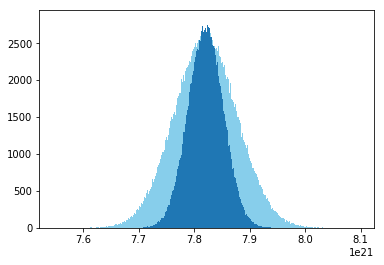

In [32]:
g = plt.hist(forces, bins=1500, color = "skyblue")
g = plt.hist(np.random.normal(force_1, dp, 1000000), bins=1500)


In [53]:
# experiment with new values

d_M21 = 2 * 1e+4
d_M22 = 10 * 1e+4
d_r2 = 1
M21 = rndm.normal(loc=M1, scale=d_M21, size=1000000)
M22 = rndm.normal(loc=M2, scale=d_M22, size=1000000)
r2 = rndm.normal(loc=r, scale=d_r2, size=1000000)
forces2 = vforce(G, M21, M22, r2)
delta_prop_nom = math.sqrt(np.power((d_M21 / M1), 2) + np.power((d_M22 / M2), 2)) * G * M1 * M2
delta_prop_denom = (2 * d_r2 / r) * r
dp = math.sqrt((delta_prop_nom / (G * M1 * M2))**2 + (delta_prop_denom / (np.power(r, 2))) ** 2) * force_1
#delta_prop2 = math.sqrt(np.power((G * M2 / (r ** 2)) * d_M21, 2) + np.power((G * M1 / (r ** 2)) * d_M22, 2) + np.power((-2 * G * M1 * M2 / (r ** 3)) * d_r2, 2))



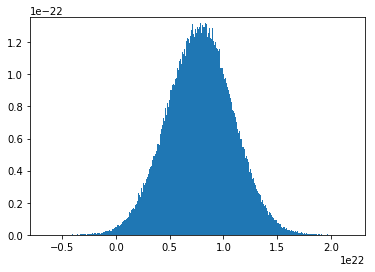

In [57]:
#t = plt.hist(forces2, bins=1500, density = True)
t = plt.hist(rndm.normal(loc=force_1, scale=dp, size=1000000),bins=1500, normed=True)